In [1]:
import figurefirst as fifi

In [2]:
import sympy as sym
import numpy as np
import numpy.linalg as la
import pylab as plt
plt.rcParams['axes.titlesize'] = 8  # Title font size
plt.rcParams['axes.labelsize'] = 8 # Axis label font size
plt.rcParams['xtick.labelsize'] = 8 # X-axis tick label font size
plt.rcParams['ytick.labelsize'] = 8 # Y-axis tick label font size
plt.rcParams['legend.fontsize'] = 8 # Legend font size
plt.rcParams['figure.dpi'] = 70

from IPython.display import display,SVG

simplify = lambda e : sym.simplify(sym.expand(e))

In [3]:
D,E = sym.var(r'd,e')
l,l_D,l_E,a,a_D,a_E,s = sym.var(r'\lambda,\lambda_D,\lambda_E,\alpha,\alpha_D,\alpha_E,\sigma')

c = ( (1 - D*E)**2 + l*D**2 + l*E**2 ) / 2
c

Dc_D = sym.diff(c,D)
Dc_E = sym.diff(c,E)

D_ = D - a_D*Dc_D
E_ = E - a_E*Dc_E

DD_D = sym.diff(D_,D)
DD_E = sym.diff(D_,E)
DE_D = sym.diff(E_,D)
DE_E = sym.diff(E_,E)

#assert Dd_e == De_d

A_ = sym.Matrix([[DD_D,DD_E],[DE_D,DE_E]])
A = sym.simplify(A_.subs({D:sym.sqrt(1-l),E:sym.sqrt(1-l)}))
A = A.subs({l:1/4})

eig = list(A.eigenvals().keys())
eig[0]

-0.5*\alpha_D - 0.5*\alpha_E - 0.5*sqrt(\alpha_D**2 - \alpha_D*\alpha_E + \alpha_E**2) + 1.0

In [4]:
c = ( (1 - D*E)**2 + l_D*D**2 + l_E*E**2 ) / 1
c

Dc_D = sym.diff(c,D)
Dc_E = sym.diff(c,E)
Dc = sym.Matrix([Dc_D,Dc_E])

# sol[0] is origin
# sol[1,2] are not real
# sol[3,4] are mirror pair
sol = sym.solve([Dc_D,Dc_E],[d,e])
sol = [sol[0],sol[3],sol[4]]

eq = sym.lambdify([l_D,l_E],sym.Matrix(sol))

In [5]:
c

\lambda_D*d**2 + \lambda_E*e**2 + (-d*e + 1)**2

In [6]:
sym.Matrix(sol[-1])

Matrix([
[sqrt(\lambda_D*\lambda_E)*sqrt(-\lambda_D + sqrt(\lambda_D*\lambda_E)/\lambda_E)/\lambda_D],
[                                    sqrt(-\lambda_D + sqrt(\lambda_D*\lambda_E)/\lambda_E)]])

In [7]:
br_D = sym.solve(Dc_D,d)[0]
br_E = sym.solve(Dc_E,e)[0]
br_E

d/(\lambda_E + d**2)

In [8]:
# dynamics
#F = simplify(sym.Matrix([a_D*d + (1-a_D)*br_D.subs({e:br_E}),br_E]))
#F = simplify(sym.Matrix([a_D*d + (1-a_D)*br_D,br_E]))
#F = simplify(sym.Matrix([a_D*d + (1-a_D)*br_D,a_E*e + (1-a_E)*br_E]))
#F = simplify(sym.Matrix([a_D*d + (1-a_D)*br_D.subs({e:a_E*e + (1-a_E)*br_E}),a_E*e + (1-a_E)*br_E]))
F = simplify(sym.Matrix([a_D*d + (1-a_D)*br_D,E - a_E*Dc_E]))
#F = simplify(sym.Matrix([D - a_D*Dc_D,E - a_E*Dc_E]))
F

Matrix([
[(\alpha_D*d*(\lambda_D + e**2) - \alpha_D*e + e)/(\lambda_D + e**2)],
[     -2*\alpha_E*\lambda_E*e - 2*\alpha_E*d**2*e + 2*\alpha_E*d + e]])

In [9]:
# check stationarity
for sol_ in sol:
    subs = {d:sol_[0],e:sol_[1]}
    assert simplify(F.subs(subs) - sym.Matrix(sol_)) == sym.Matrix([0,0]) # fixed point of dynamics
    assert sym.Matrix([0,0]) == simplify(Dc.subs(subs)) # stationarity of gradients

### origin
Unstable for $\alpha_D\in(0,1)$ and $\lambda_D\lambda_E\in(0,1)$ b/c upper-left eigenvalue is a linear function of $\alpha_D$ that is larger than $1$ at $\alpha_D = 0$ and equal to $1$ at $\alpha_D = 1$.

In [10]:
# origin: unstable
subs = {d:sol[0][0],e:sol[0][1]}
A = sym.Matrix.hstack(sym.diff(F,d),sym.diff(F,e)).subs(subs)
simplify(A)
sym.Matrix(list(sym.Matrix.eigenvals(A).keys()))

Matrix([
[\alpha_D/2 - \alpha_E*\lambda_E + 1/2 - sqrt(\lambda_D*(\alpha_D**2*\lambda_D + 4*\alpha_D*\alpha_E*\lambda_D*\lambda_E - 8*\alpha_D*\alpha_E - 2*\alpha_D*\lambda_D + 4*\alpha_E**2*\lambda_D*\lambda_E**2 - 4*\alpha_E*\lambda_D*\lambda_E + 8*\alpha_E + \lambda_D))/(2*\lambda_D)],
[\alpha_D/2 - \alpha_E*\lambda_E + 1/2 + sqrt(\lambda_D*(\alpha_D**2*\lambda_D + 4*\alpha_D*\alpha_E*\lambda_D*\lambda_E - 8*\alpha_D*\alpha_E - 2*\alpha_D*\lambda_D + 4*\alpha_E**2*\lambda_D*\lambda_E**2 - 4*\alpha_E*\lambda_D*\lambda_E + 8*\alpha_E + \lambda_D))/(2*\lambda_D)]])

### first and third quadrant
Stable because eigenvalue is concave-up parabola that is $1$ for $\lambda_D\lambda_E \in \{0,1\}$ and minimized at $\lambda_D\lambda_E = 1/2$. Also depends linearly on $\alpha_D$ and increases from a non-negative value $1 + \lambda_D\lambda_E - \sqrt{\lambda_D\lambda_E}$ at $\alpha_D = 0$ to $1$ at $\alpha_D = 1$.

In [11]:
sol_ = sol[-1]; subs = {d:sol_[0],e:sol_[1]}
A = (sym.Matrix.hstack(sym.diff(F,d),sym.diff(F,e)).subs(subs))
A_ = sym.lambdify([a_D,a_E,l_D,l_E],A)
ev = simplify(sym.Matrix(list(sym.Matrix.eigenvals(A).keys())))
ev
ev_ = sym.lambdify([a_D,a_E,l_D,l_E],ev)

# FigureFirst

{'ismplfigure': False}


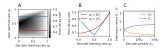

In [24]:
N = 1000; lD,lE = .25,.25
aD = np.linspace(0,1,N)
aE = np.linspace(0,1,N)
AD,AE = np.meshgrid(aD, aE)
im = np.max(np.abs(ev_(AD,AE,lD,lE)),axis=0)[0]
im[im > 1] = np.nan
#assert np.all(im >= 0)

lo = fifi.svg_to_axes.FigureLayout('fifi.svg', autogenlayers=True, 
                       make_mplfigures=True, hide_layers=['layout']);
lo.clear_fflayer('mpl_layer')

ax = lo.axes[('fig','A')]
im = ax.imshow(im,origin='lower',cmap='gray');
cb = plt.colorbar(im,ax=ax['axis'],label=r'Error decay rate');
#cb.set_ticks([0,.2,.4,.6,.8,1])
ax.plot([0,N],[1.5*N/2]*2,color='tab:blue')
ax.plot([0,N],[.5*N/2]*2,color='tab:red')
ax.set_xlim([0,N])
ax.set_xticks([0,N//2,N])
ax.set_xticklabels([0,1/2,1])
ax.set_xlabel(r'Decoder learning rate $\alpha_D$')
ax.set_ylim([0,N])
ax.set_yticks([0,N//2,N])
ax.set_yticklabels([0,1/2,1])
ax.set_ylabel(r'User learning rate $\alpha_E$');

ax = lo.axes[('fig','B')]
ax.plot(aD,np.max(np.abs(ev_(aD,.75*np.ones(aD.size),lD,lE)),axis=0)[0],label=r'$\alpha_E = 3/2$')
ax.plot(aD,np.max(np.abs(ev_(aD,.25*np.ones(aD.size),lD,lE)),axis=0)[0],label=r'$\alpha_E = 1/2$',color='tab:red')
ax.legend()
ax.set_xlim([aD[0],aD[-1]])
ax.set_xlabel(r'Decoder learning rate $\alpha_D$')
ax.set_ylabel(r'Error decay rate');

ax = lo.axes[('fig','C')]
_lE_ = .1
lD = np.linspace(1e-3,1/(4*_lE_),N)
eqD,eqE = np.array([eq(_,_lE_)[-1] for _ in lD]).T
ax.plot(lD,eqD,color='#f1a340',label=r'$D_*$')
ax.plot(lD,eqE,color='tab:purple',label=r'$E_*$')
ax.legend()
#assert np.all(np.diff(np.array([eq(_,.5)[-1] for _ in lD]),axis=0)*[-1,1] >= 0)
ax.set_xlabel(r'Decoder penalty $\lambda_D$')
ax.set_ylabel(r'Stationary values $D_*,\ E_*$')
ax.set_xlim(0,lD.max())
ax.set_xticks([0,lD.max()/2,lD.max()])
ax.set_xticklabels(['0',r'$1/8\lambda_E$',r'$1/4\lambda_E$'])

#lo.insert_figures('figure')
lo.save('fifiout.svg');
plt.close('all'); display(SVG('fifi.svg'))

# Matplotlib

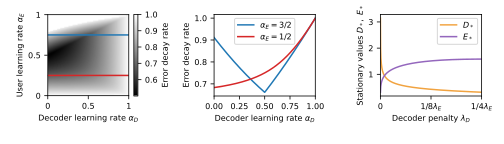

In [25]:
N = 1000; lD,lE = .25,.25
aD = np.linspace(0,1,N)
aE = np.linspace(0,1,N)
AD,AE = np.meshgrid(aD, aE)
im = np.max(np.abs(ev_(AD,AE,lD,lE)),axis=0)[0]
im[im > 1] = np.nan
#assert np.all(im >= 0)

fig = plt.figure(figsize=(7,2)); plt.clf()

ax = plt.subplot(131)
plt.imshow(im,origin='lower',cmap='gray')
cb = plt.colorbar(label=r'Error decay rate');
#cb.set_ticks([0,.2,.4,.6,.8,1])
plt.plot([0,N],[1.5*N/2]*2,color='tab:blue')
plt.plot([0,N],[.5*N/2]*2,color='tab:red')
ax.set_xlim([0,N])
ax.set_xticks([0,N//2,N])
ax.set_xticklabels([0,1/2,1])
ax.set_xlabel(r'Decoder learning rate $\alpha_D$')
ax.set_ylim([0,N])
ax.set_yticks([0,N//2,N])
ax.set_yticklabels([0,1/2,1])
ax.set_ylabel(r'User learning rate $\alpha_E$');

ax = plt.subplot(132)
plt.plot(aD,np.max(np.abs(ev_(aD,.75,lD,lE)),axis=0)[0],label=r'$\alpha_E = 3/2$')
plt.plot(aD,np.max(np.abs(ev_(aD,.25,lD,lE)),axis=0)[0],label=r'$\alpha_E = 1/2$',color='tab:red')
plt.legend()
ax.set_xlim([aD[0],aD[-1]])
ax.set_xlabel(r'Decoder learning rate $\alpha_D$')
ax.set_ylabel(r'Error decay rate');

ax = plt.subplot(133)
_lE_ = .1
lD = np.linspace(1e-3,1/(4*_lE_),N)
eqD,eqE = np.array([eq(_,_lE_)[-1] for _ in lD]).T
ax.plot(lD,eqD,color='#f1a340',label=r'$D_*$')
ax.plot(lD,eqE,color='tab:purple',label=r'$E_*$')
plt.legend()
#assert np.all(np.diff(np.array([eq(_,.5)[-1] for _ in lD]),axis=0)*[-1,1] >= 0)
ax.set_xlabel(r'Decoder penalty $\lambda_D$')
ax.set_ylabel(r'Stationary values $D_*,\ E_*$')
ax.set_xlim(0,lD.max())
ax.set_xticks([0,lD.max()/2,lD.max()])
ax.set_xticklabels(['0',r'$1/8\lambda_E$',r'$1/4\lambda_E$'])

plt.tight_layout()
plt.savefig('matplotlib.svg')
plt.close('all'); display(SVG('matplotlib.svg'))

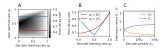

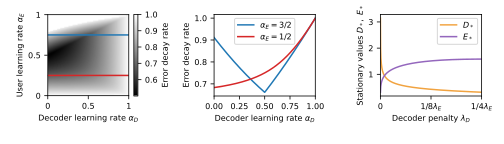

In [26]:
display(SVG('fifiout.svg'))
display(SVG('matplotlib.svg'))